# Exploratory Data Analysis Project with AWS S3 + Snowflake SQL 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-Project-with-AWS-S3-+-Snowflake-SQL" data-toc-modified-id="Exploratory-Data-Analysis-Project-with-AWS-S3-+-Snowflake-SQL-1">Exploratory Data Analysis Project with AWS S3 + Snowflake SQL</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Datasets" data-toc-modified-id="Datasets-1.1.1">Datasets</a></span></li><li><span><a href="#Business-Questions-to-be-Answered" data-toc-modified-id="Business-Questions-to-be-Answered-1.1.2">Business Questions to be Answered</a></span></li></ul></li><li><span><a href="#Creating-the-Snowflake-Database" data-toc-modified-id="Creating-the-Snowflake-Database-1.2">Creating the Snowflake Database</a></span></li><li><span><a href="#Setting-up-the-integration-with-AWS-S3" data-toc-modified-id="Setting-up-the-integration-with-AWS-S3-1.3">Setting up the integration with AWS S3</a></span></li><li><span><a href="#Creating-the-3-Database-Tables-and-Storing-the-Data" data-toc-modified-id="Creating-the-3-Database-Tables-and-Storing-the-Data-1.4">Creating the 3 Database Tables and Storing the Data</a></span></li><li><span><a href="#Querying-the-Data-in-Snowflake-to-Answer-Business-Questions" data-toc-modified-id="Querying-the-Data-in-Snowflake-to-Answer-Business-Questions-1.5">Querying the Data in Snowflake to Answer Business Questions</a></span><ul class="toc-item"><li><span><a href="#Summary-of-Patients-Table" data-toc-modified-id="Summary-of-Patients-Table-1.5.1">Summary of Patients Table</a></span></li><li><span><a href="#Summary-of-Scores-Table" data-toc-modified-id="Summary-of-Scores-Table-1.5.2">Summary of Scores Table</a></span></li><li><span><a href="#Summary-of-Drugs-Table" data-toc-modified-id="Summary-of-Drugs-Table-1.5.3">Summary of Drugs Table</a></span></li><li><span><a href="#Calculating-the-delta-between-the-current-and-prior-PHQ-scores-and-the-amount-of-time-elapsed-between-the-score-dates" data-toc-modified-id="Calculating-the-delta-between-the-current-and-prior-PHQ-scores-and-the-amount-of-time-elapsed-between-the-score-dates-1.5.4">Calculating the delta between the current and prior PHQ scores and the amount of time elapsed between the score dates</a></span></li><li><span><a href="#How-many-patients-were-prescribed-a-drug-before-their-first-PHQ-assessment?" data-toc-modified-id="How-many-patients-were-prescribed-a-drug-before-their-first-PHQ-assessment?-1.5.5">How many patients were prescribed a drug before their first PHQ assessment?</a></span></li><li><span><a href="#How-many-female-patients-were-assessed-for-PHQ-score-at-least-twice-after-the-first-time-they-were-prescribed-drug-H?" data-toc-modified-id="How-many-female-patients-were-assessed-for-PHQ-score-at-least-twice-after-the-first-time-they-were-prescribed-drug-H?-1.5.6">How many female patients were assessed for PHQ score at least twice after the first time they were prescribed drug H?</a></span></li></ul></li><li><span><a href="#Recommendations-&amp;-Next-Steps" data-toc-modified-id="Recommendations-&amp;-Next-Steps-1.6">Recommendations &amp; Next Steps</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7">Conclusion</a></span></li></ul></li></ul></div>

## Introduction

This project was completed as part of a consulting engagement for a mental health startup. For the sake of data privacy and maintaining anonymity, I am using the name "Whole-Health" instead of the actual company's name. And the provided data are synthetic (i.e simulated from patients in the Whole-Health network).

Whole Health leverages AI, Data Science and Clinical Data to provide affordable, high-quality mental health care to patients, all from the comfort and privacy of their homes.

Senior executives of Whole Health engaged my services to help them analyzing patients data in their database, to investigate the impact of patient’s mental health PHQ assessment on drug prescription and frequency.


<br>


### Datasets
The provided data are synthetic and were simulated from patients in the Whole-Health network.
Patients: each row represents a unique patient, along with their sex.
Scores: each row represents a unique instance of a patient completing the Patient Health Questionnaire (PHQ-9). Scores range from 0-27, with higher scores indicating greater severity of depression symptoms.
Drugs: each row represents a unique prescription written by a clinician for a single patient.

<br>


### Business Questions to be Answered
- Provide a summary of the patients, drugs and scores datasets separately.  There are no specific guidelines for what to include but your summary should provide a thorough overview of the observations being analyzed.
- Transform the scores dataset to display a comparison view of a patient’s PHQ score on a given date, their score from their previous assessment, and the date of their previous assessment.  Calculate the delta between the current and prior PHQ scores and the amount of time elapsed between the score dates.  The final dataset should contain seven columns: patient_id, phq_score, score_date, prior_phq_score, prior_score_date, phq_score_delta, score_date_delta. 
- Facts/Stats -- report the number of patients for each question (a single number is sufficient):
    - How many patients were prescribed a drug before their first PHQ assessment?
    - How many female patients were assessed for PHQ score at least twice after the first time they were prescribed drug H?

<br>

## Creating the Snowflake Database

First step is to create a free trial Snowflake account. This account comes with 2 databases by default:
- SNOWFLAKE
- SNOWFLAKE_SAMPLE_DATA

But I wanted to create my own Database to store my data. See step below

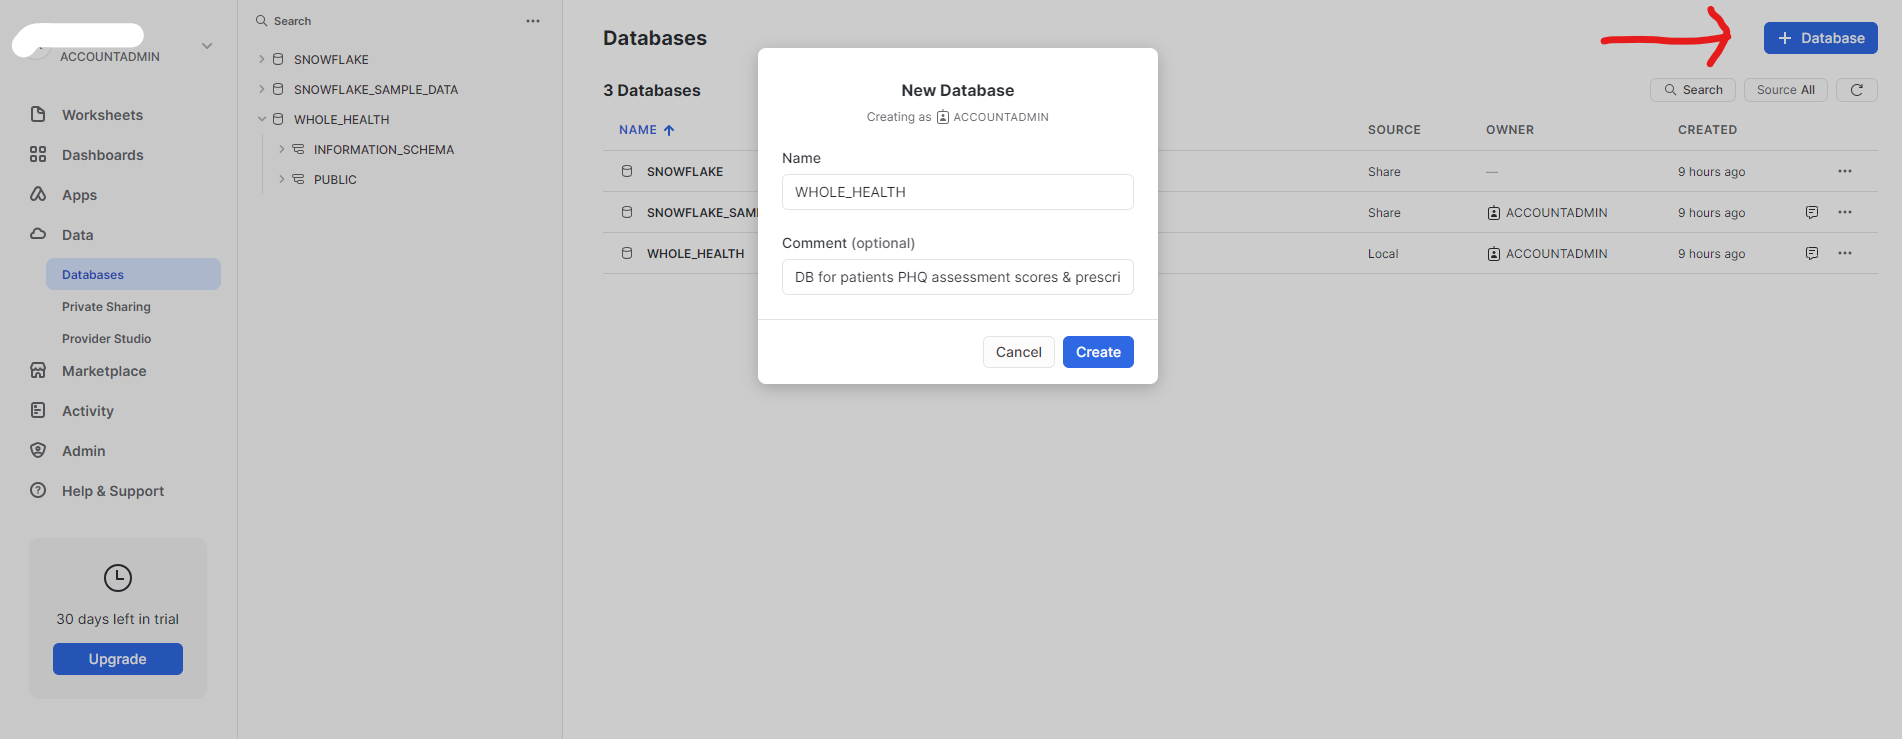
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


<br>

Now the database has been created 


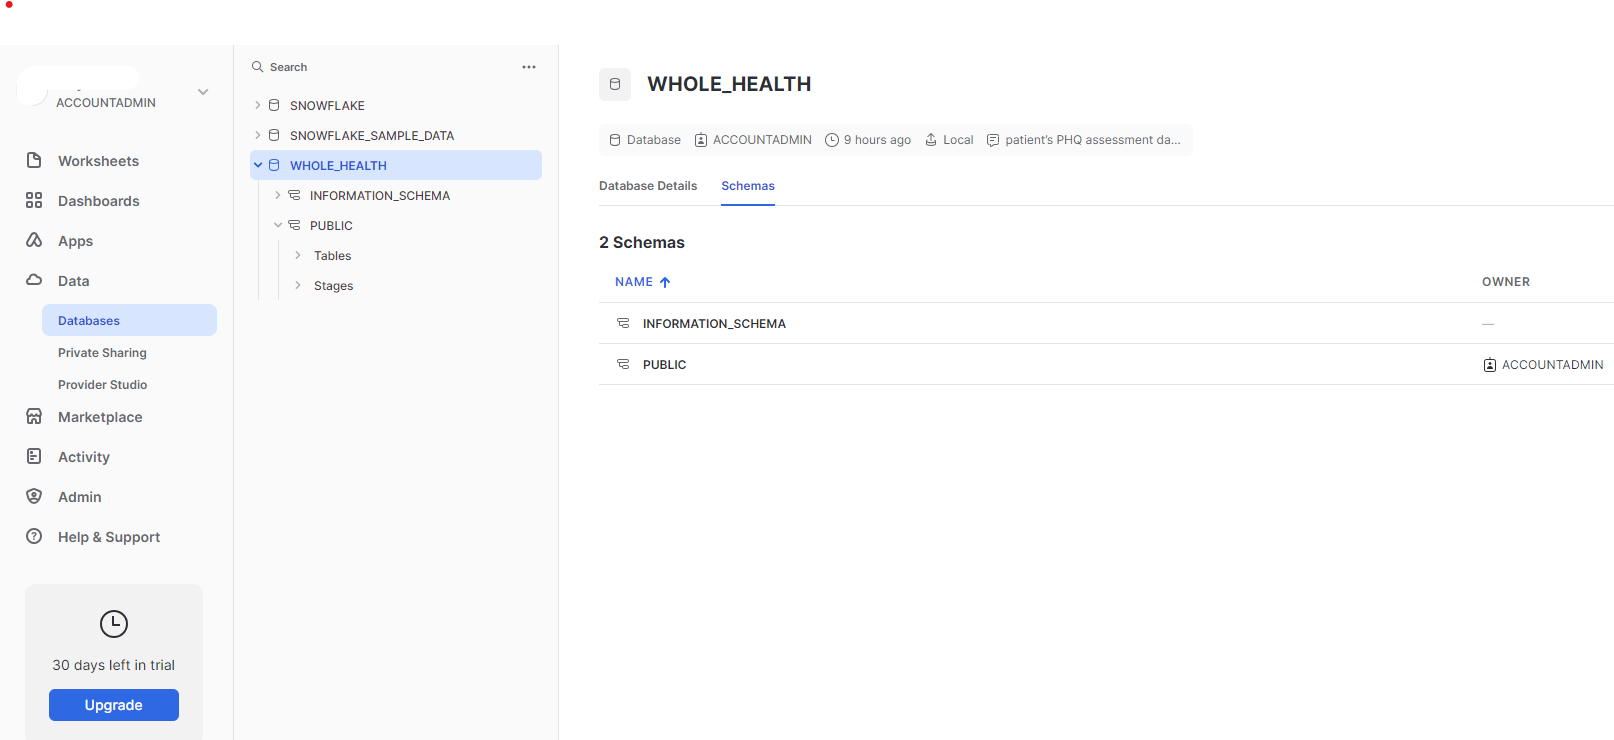
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>

Next steps include:
- 1) Click on worksheets tab (top left just below the Snowflake account name)
- 2) New Worksheet (The + Icon at the top right corner)
- 3) Choose `SQL Worksheet` from the drop down menu

See screenshot below.


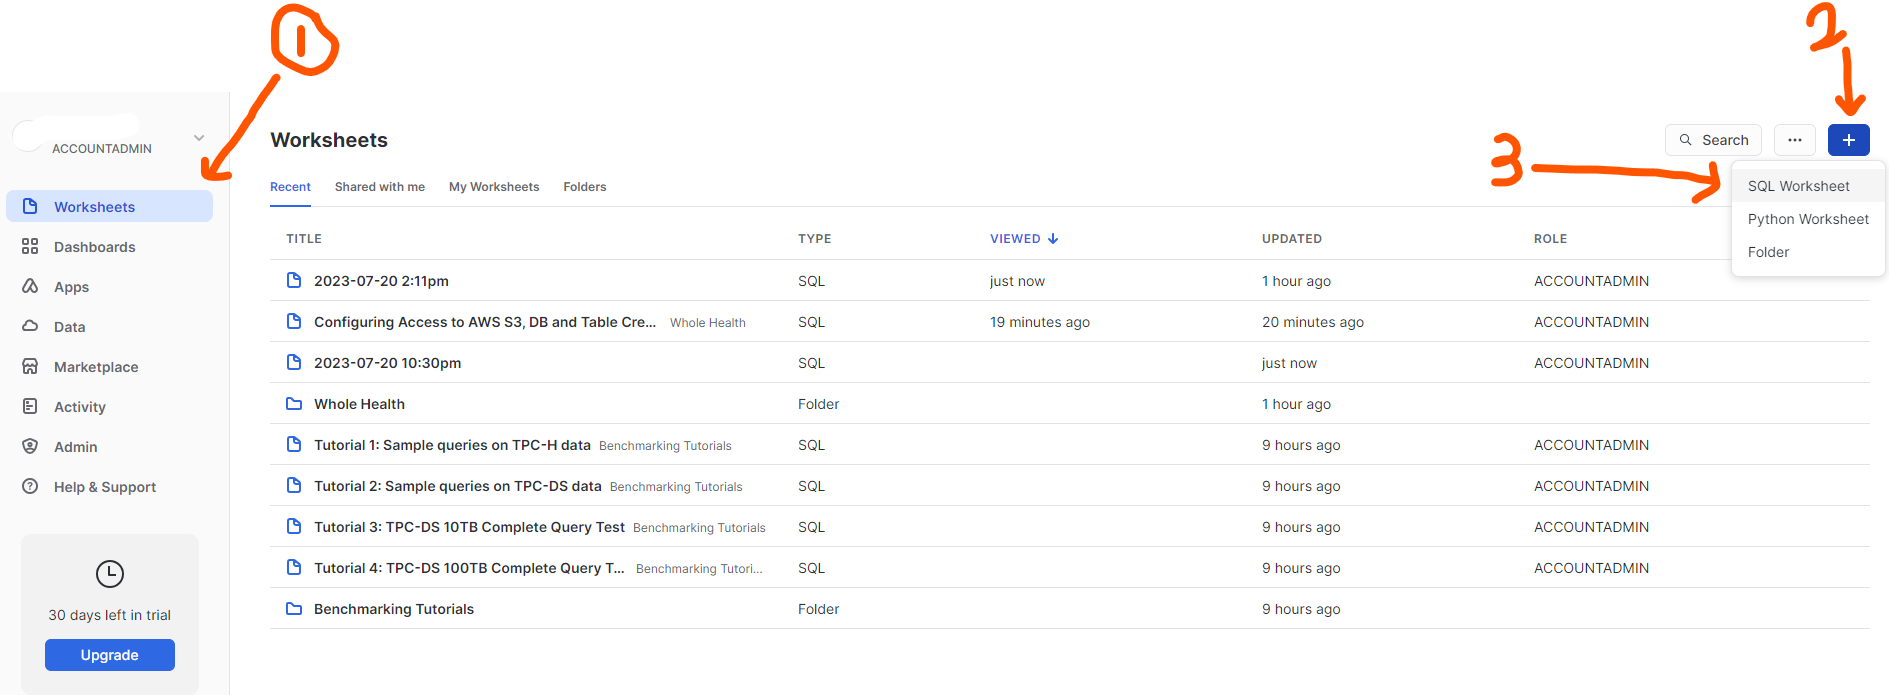
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>

Next I renamed my worksheet, created a folder, and then moved my worksheet there. Just so I have all my worksheets for this project in one location.
See screenshot below.


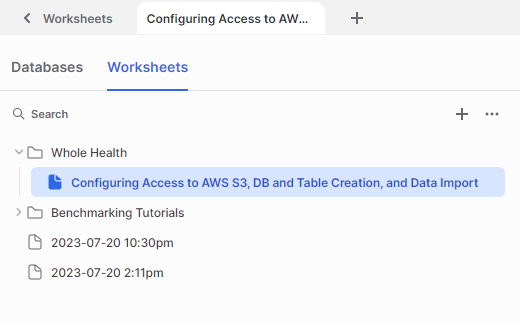
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>

Now open the worksheet and run the Snowflake SQL statements below to set up the integration with AWS S3

<br>



## Setting up the integration with AWS S3 


**Note:** I have used placeholders like `<account-id>`, `<role-name>`, `<s3-bucket-name>` for security purposes. Replace all placeholders with your actual info.

Refer to [Snowflake Documentation](https://docs.snowflake.com/en/user-guide/data-load-s3-config-storage-integration) for more.

<br>

**SQL Statements in Snowflake**

```sql
-- Setup the integration with AWS S3 where the CSV objects containing the required data are stored
-- This data would be ingested into tables here in snowflake
DROP STORAGE INTEGRATION IF EXISTS aws_s3_integration;

CREATE STORAGE INTEGRATION aws_s3_integration
TYPE = EXTERNAL_STAGE
STORAGE_PROVIDER = 'S3'
ENABLED = TRUE
STORAGE_AWS_ROLE_ARN = 'arn:aws:iam::<account-id>:role/<role-name>'
STORAGE_ALLOWED_LOCATIONS = ('s3://<s3-bucket-name>/');
--------------------------------------------------------
```

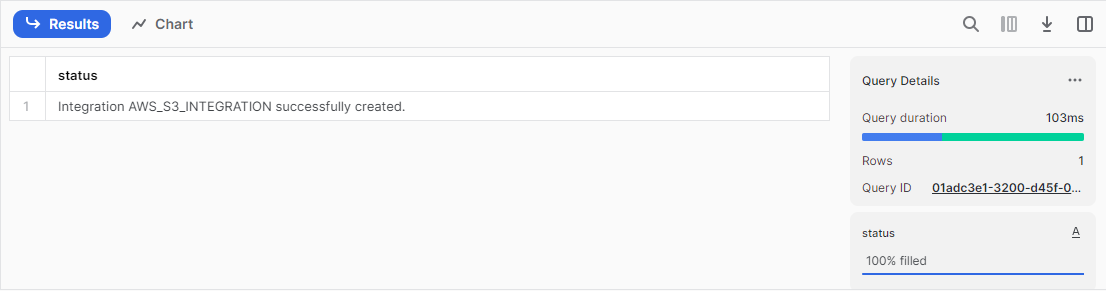
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>


```sql

-- Retrieving the AWS IAM user for this Snowflake account
DESC INTEGRATION aws_s3_integration;
------------------------------------

```

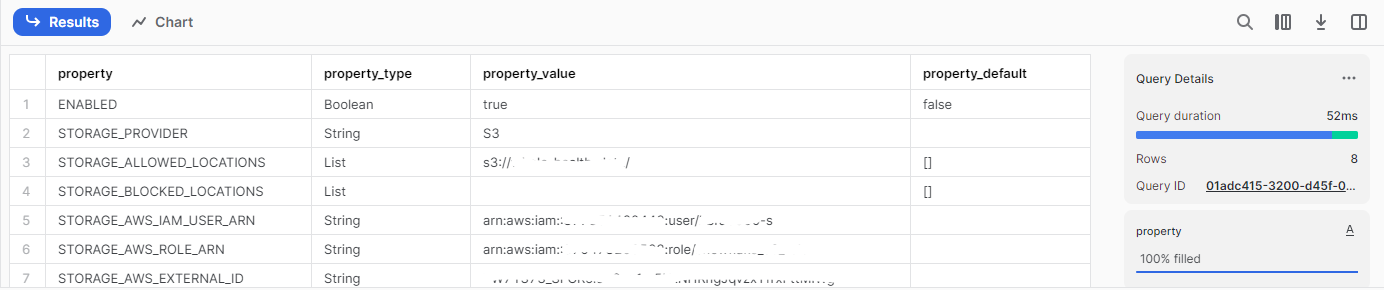
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>

**Note:** _Actual values for my AWS IAM user credentials have been erased for security_

<br>


```sql

-- Showing roles here in snowflake to decide which role to use when granting access to the integration
SHOW ROLES;
-----------

```

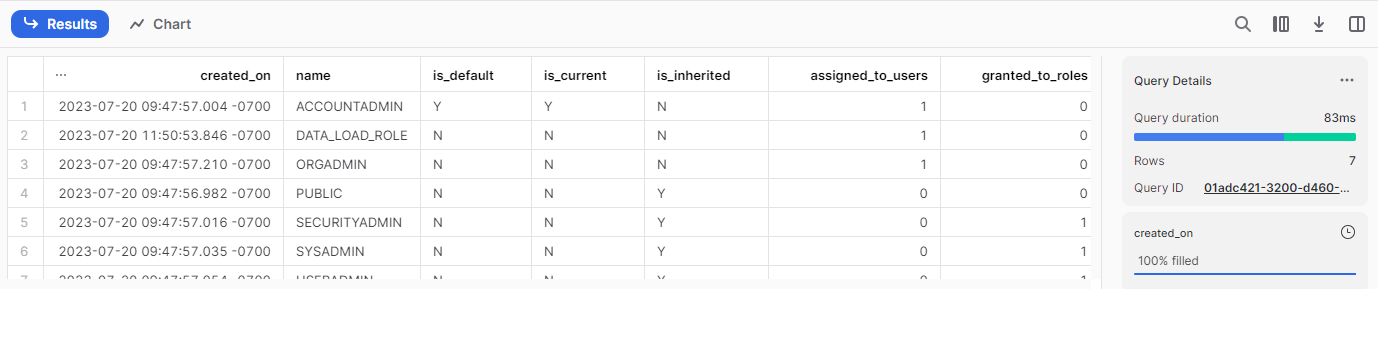
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


Now I can see all the roles associated with my Snowflake account. To keep things simple, I would go with the `ACCOUNTADMIN` role. But in work-scenarios, this is where I could create a new role and define permissions and privileges.

<br>


```sql

-- Granting usage of the integration to the accountadmin role
GRANT USAGE ON INTEGRATION aws_s3_integration TO ROLE accountadmin;
-------------------------------------------------------------------

-- Using the whole_health database and public schema that I already created
USE DATABASE whole_health;
USE SCHEMA public;
------------------

```

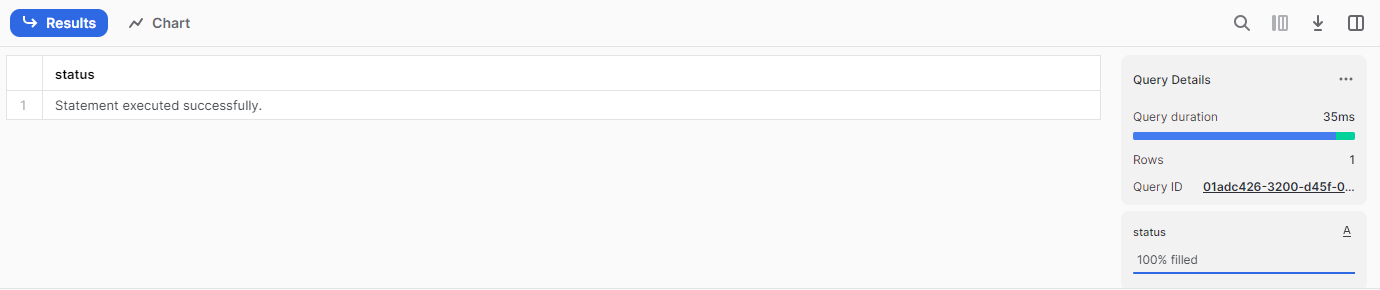
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

```sql

-- Creating an external stage that references the AWS S3 bucket that I want to import data from
DROP STAGE IF EXISTS my_s3_stage;

CREATE OR REPLACE STAGE my_s3_stage
URL = 's3://<s3-bucket-name>/'
CREDENTIALS = ( AWS_KEY_ID = '<string>' AWS_SECRET_KEY = '<string>')
FILE_FORMAT = (TYPE = CSV FIELD_OPTIONALLY_ENCLOSED_BY=','); --Check what your file type is and its delimiter, I used comma (,) here since it's a CSV file
------------------------------------------------------------

```

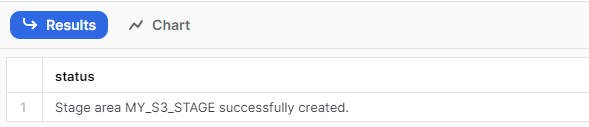
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

```sql

-- Listing the contents of the external stage I just created, to make sure I have access to the files in the s3 bucket
LIST @my_s3_stage;
------------------

```
<br>

Now I can see all 3 csv files containing the data that I want to import. See below

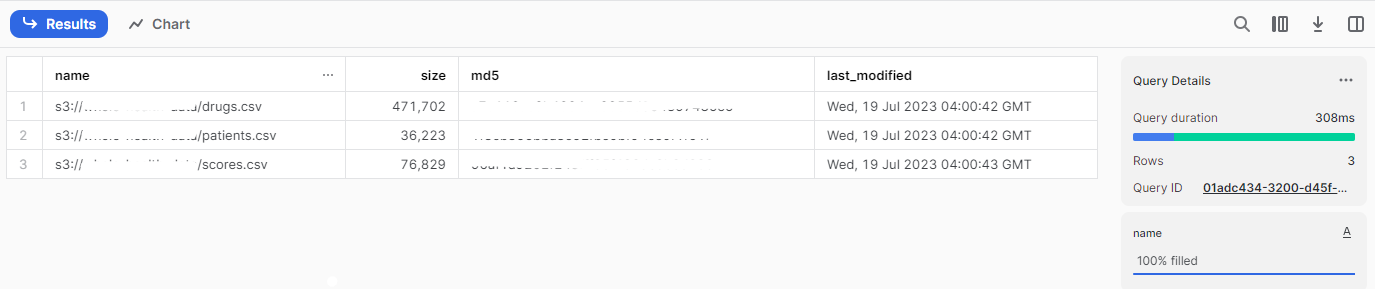
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

## Creating the 3 Database Tables and Storing the Data


```sql

-- Creating the drugs table within the database public schema
DROP TABLE IF EXISTS public.drugs;

CREATE TABLE IF NOT EXISTS drugs (
patient_id integer,
written_date date,
drug_class character varying,
drug_name character varying
    );
-- Then load data into the newly created table, from the csv file in the S3 bucket that was staged in "my_s3_stage"
COPY INTO drugs
FROM @my_s3_stage/drugs.csv
FILE_FORMAT = (TYPE = CSV FIELD_DELIMITER=',' SKIP_HEADER = 1); -- Using the comma (,) delimiter and skipping the first row which only contains the column names
---------------------------------------------------------------

```

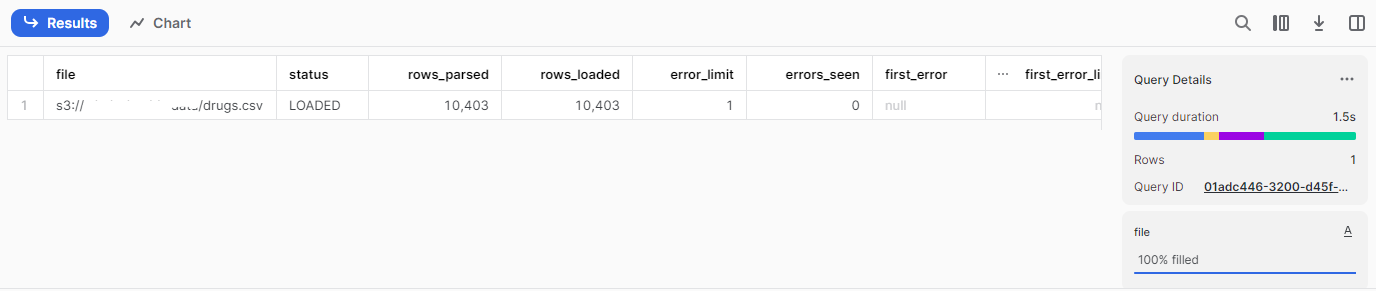
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

```sql

-- Confirming that my data from the drugs.csv file in s3 was copied into my Snowflake database table successfully,
-- by viewing a snippet of the drugs table
SELECT *
FROM drugs
LIMIT 3; -- Limiting the query output, thus shortening query time to save costs
--------

```

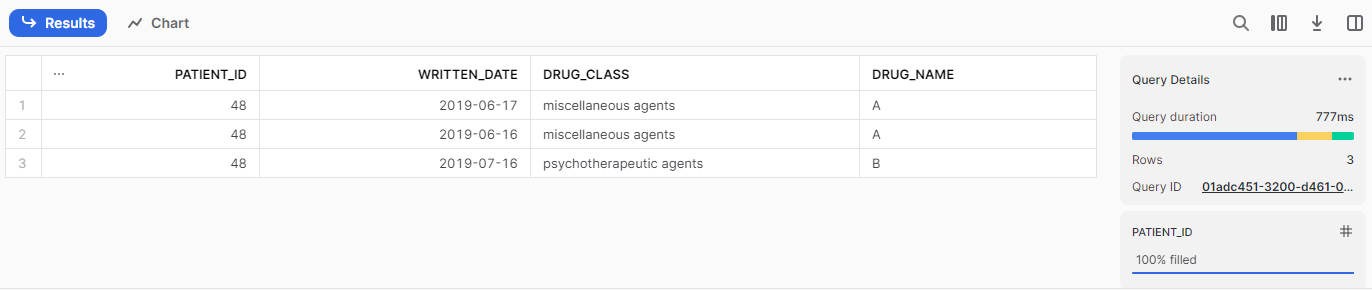
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


```sql

-- Creating the patients table
DROP TABLE IF EXISTS public.patients;

CREATE TABLE IF NOT EXISTS patients (
patient_id character varying, -- In the csv file, there's a string before the id e.g patient_id_1234, so VARCHAR for now
sex character varying
    );
-- Then load data into the newly created table, from the csv file in the S3 bucket that was staged in "my_s3_stage"
COPY INTO patients
FROM @my_s3_stage/patients.csv
FILE_FORMAT = (TYPE = CSV FIELD_DELIMITER=',' SKIP_HEADER = 1);
---------------------------------------------------------------

```

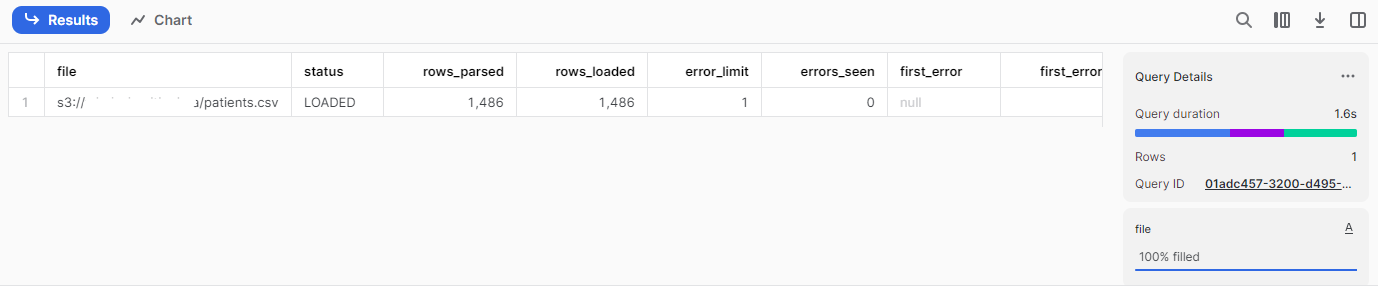
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


```sql

-- Confirming successful data import
SELECT *
FROM patients
LIMIT 3; -- Limiting the query output, thus shortening query time to save costs
--------

```

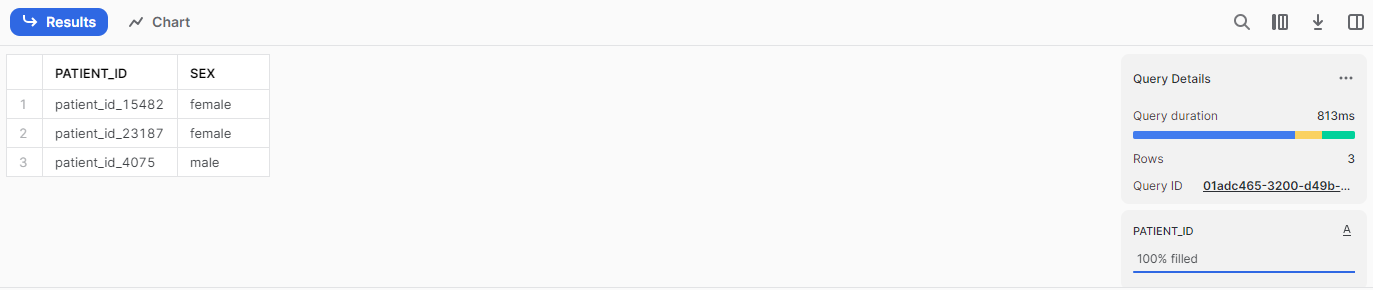
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

```sql

-- Last but not least, creating the scores table
DROP TABLE IF EXISTS public.scores;

CREATE TABLE IF NOT EXISTS scores (
patient_id integer,
phq_score integer,
score_date date
    );
-- Then load data into the newly created table, from the csv file in the S3 bucket that was staged in "my_s3_stage"
COPY INTO scores
FROM @my_s3_stage/scores.csv
FILE_FORMAT = (TYPE = CSV FIELD_DELIMITER=',' SKIP_HEADER = 1);
---------------------------------------------------------------

```

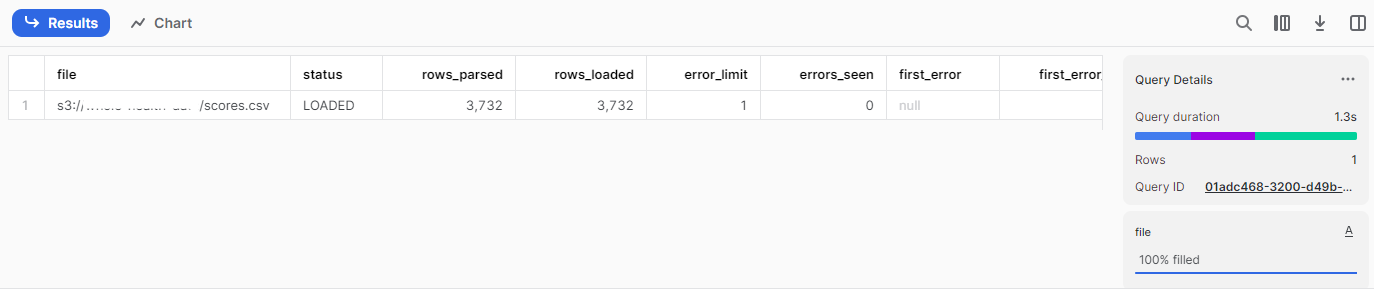
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>



```sql

-- Confirming successful data import
SELECT *
FROM scores
LIMIT 3; -- Limiting the query output, thus shortening query time to save costs
--------

```

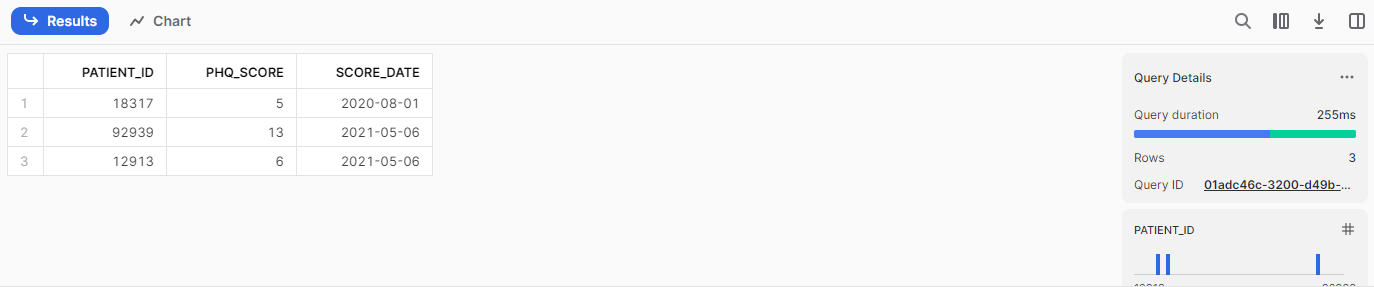
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

## Querying the Data in Snowflake to Answer Business Questions


### Summary of Patients Table

```sql

--Number of records of patients
SELECT COUNT(*) as record_count
FROM patients;
-- Observation: There are 1486 records in this table
----------------------------------------------------

```

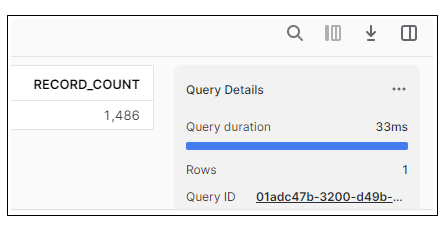

<br>


```sql

-- Counting number of distinct records to make sure there are no duplicates
SELECT COUNT(DISTINCT patient_id) AS distinct_patient_count
FROM patients;
-- Observation: Distinct record count is the same as above. There are no duplicates
--------------

```

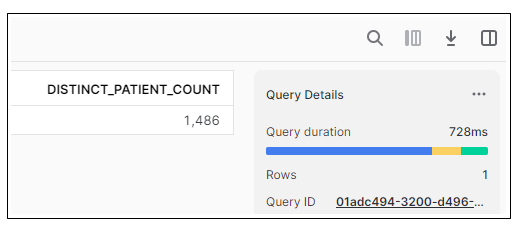

<br>

**Observations:**
- There were 1486 records in this table.
- The count of distinct records returned the same number as above. 
- There were no duplicate records in this table.

<br>


```sql

--Gender Distribution
SELECT 
    sex, 
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0) / (SELECT COUNT(*) FROM patients), 1) AS percentage
FROM patients 
GROUP BY sex
ORDER BY count DESC;
-- Observation: Approx. 79% are females and Approx. 21% are males. There is one record with a missing gender value
-------------------

```

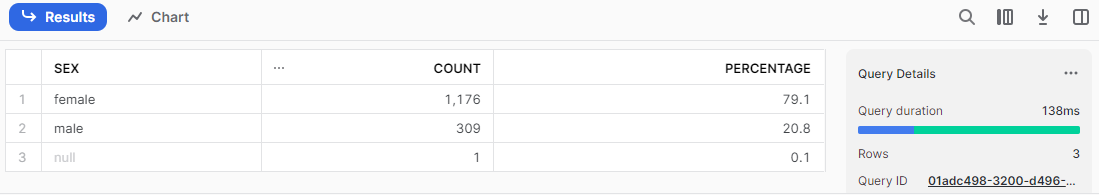
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


<br>

**Observations:**
- There were more female patients (approx. 79%) than males (approx. 21%)
- The ratio of female to male patients was 4 to 1
- There was one record with a missing gender value. Record will be investigated further during data wrangling, and necessary action taken.

<br>

```sql

-- Viewing first 3 rows of the patients table
SELECT *
FROM patients
LIMIT 5;
-- Observation: Quick overview of the patients table reveals that data cleaning is to be performed on the patient_id variable 
-------------

```

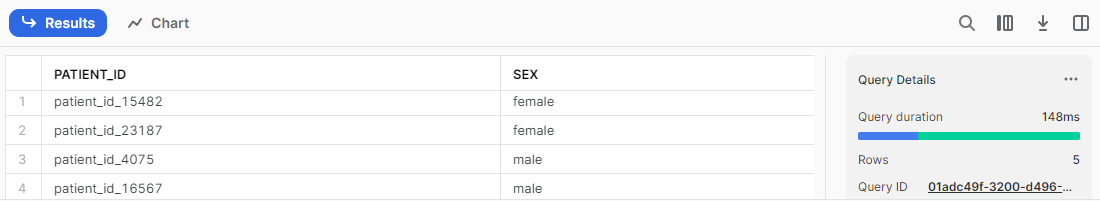
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>



```sql

-- Extracting the actual patient id from each string and Converting the string value to an integer
SELECT 
    CAST(SUBSTR(patient_id, 12) AS INT) AS patient_id
FROM patients;
--------------

```

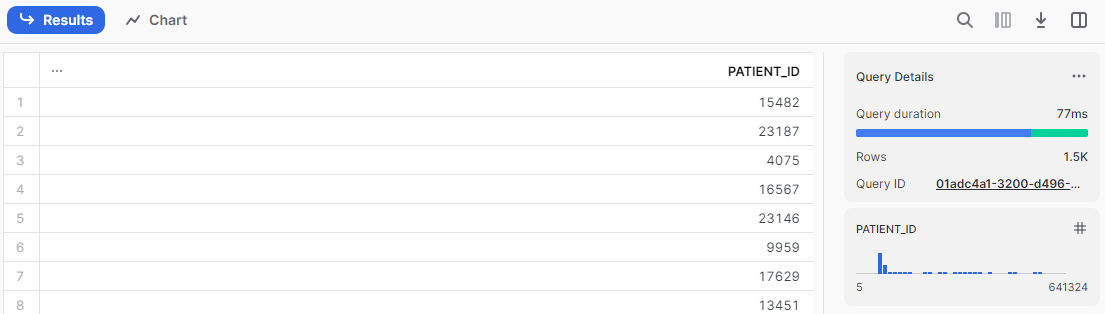
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


<br>

Let's move on to the `scores` table

### Summary of Scores Table


```sql

-- Counting the number of records in the scores table
SELECT COUNT(*)
FROM scores;
---------------

```

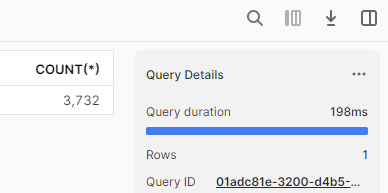

<br>



```sql

-- Counting number of distinct records to make sure there are no duplicates
SELECT COUNT(*)
FROM (SELECT DISTINCT * FROM scores) AS distinct_records;
---------------------------------------------------------

```

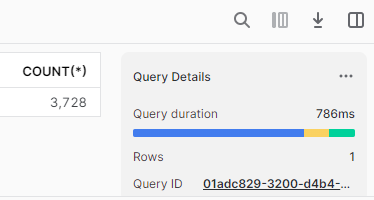

<br>




```sql

-- Query to return the original and duplicate records (i.e both first and second or more occurrence of the same record)
SELECT *
FROM scores
WHERE (patient_id, phq_score, score_date) IN (
    SELECT patient_id, phq_score, score_date
    FROM scores
    GROUP BY patient_id, phq_score, score_date
    HAVING COUNT(*) > 1
)
ORDER BY patient_id, phq_score, score_date;
-------------------------------------------

```

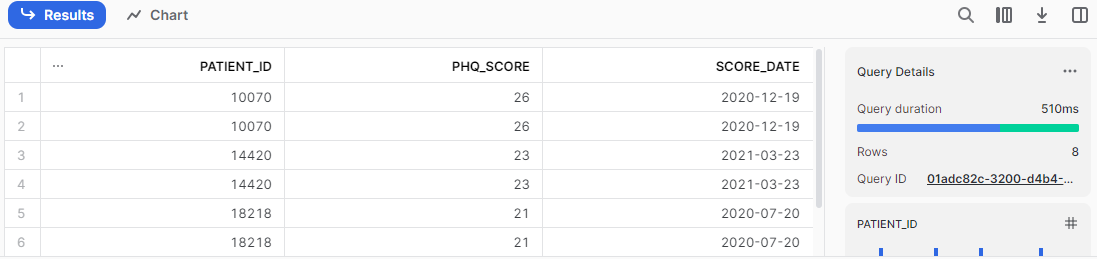
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


<br>

**Observations:**
- Initially, there were 3732 records in this table.
- 3728 distinct records and 4 duplicate records. 
- Data wrangling will be used to identify and remove all duplicates.

<br>


```sql

-- Summary statistics of the phq scores
SELECT
    MIN(phq_score) AS min_score,
    MAX(phq_score) AS max_score,
    ROUND(AVG(phq_score), 1) AS average_score,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY phq_score) AS median_score
FROM scores;
------------

```

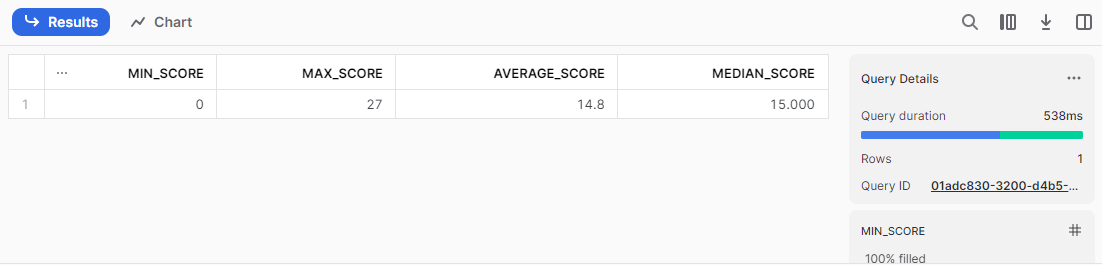
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>

**Observations:**
- The PHQ scores ranged from 0 to 27, where 0 represented no symptoms and 27 indicated the highest severity of depression symptoms.
- The average PHQ score among patients was 14.8, suggesting a moderate level of symptom severity.
- The median PHQ score was 15, indicating that half of the scores were below this value.
- A check for outliers was conducted, and it was determined that all recorded PHQ scores were valid, as no outliers were found.

<br>


```sql

-- Distribution of scores according to depression severity
SELECT 
    CASE 
        WHEN phq_score BETWEEN 0 AND 4 THEN 'none or minimal'
        WHEN phq_score BETWEEN 5 AND 9 THEN 'mild depression'
        WHEN phq_score BETWEEN 10 AND 14 THEN 'moderate depression'
        WHEN phq_score BETWEEN 15 AND 19 THEN 'moderately severe'
        WHEN phq_score >= 20 THEN 'severe depression'
        ELSE 'Error'
    END AS depression_severity,    
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0) / (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM scores) AS distinct_records), 1) AS percentage
FROM (SELECT DISTINCT * FROM scores) AS distinct_records
GROUP BY depression_severity
ORDER BY count DESC;
--------------------

```

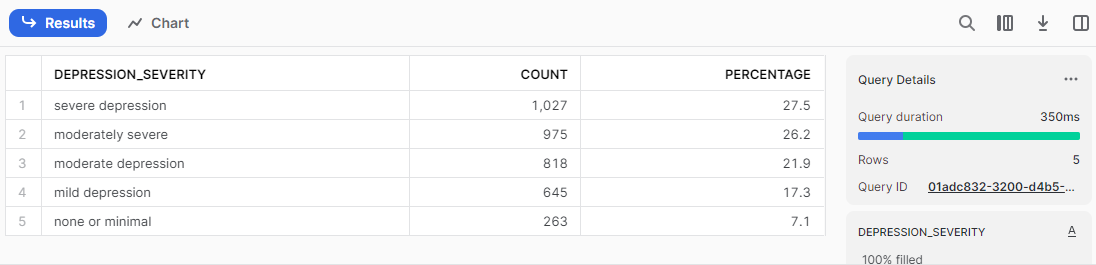
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


<br>

**Observations:**
- The majority of patients reported higher levels of depression.
- Categories such as "severe depression," "moderately severe," and "moderate depression" collectively accounted for over two-thirds (75%) of all patients' PHQ assessments.
- Among these categories, "severe depression" was the most significant.
- Patients with mild depression made up approximately 17% of the assessments.
- A very small proportion of patients experienced minimal or no depression severity.

<br>


### Summary of Drugs Table


```sql

-- Query to count the number of records
SELECT COUNT(*) AS records_count
FROM drugs;
-----------

```

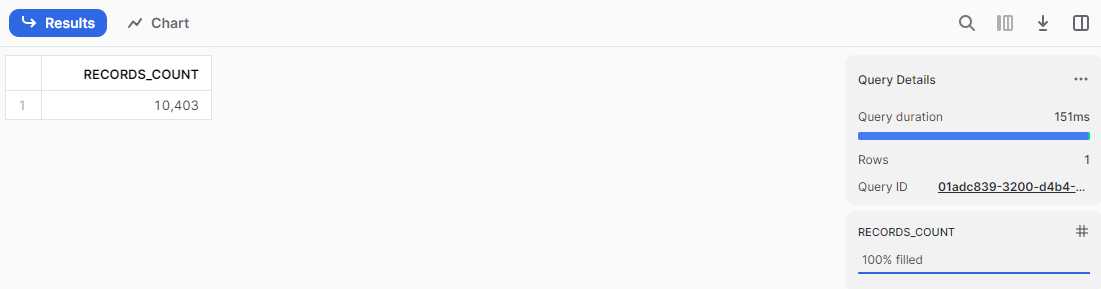
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>



```sql

-- Query to count the number of distinct records to check for duplicates
SELECT COUNT(*) AS distinct_records_count
FROM (SELECT DISTINCT * FROM drugs) AS distinct_records;
--------------------------------------------------------

```

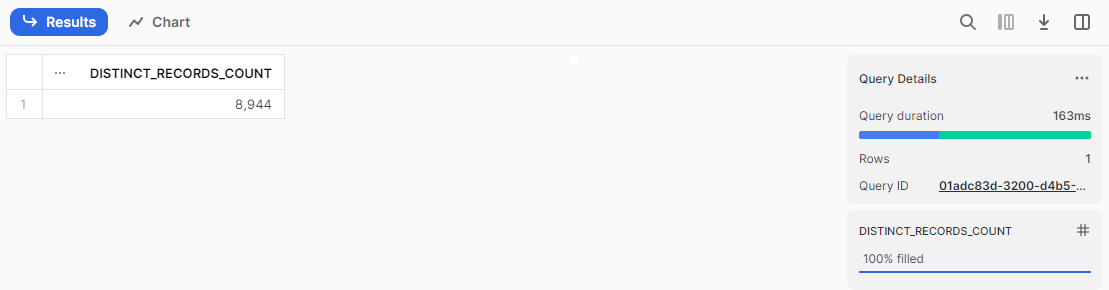
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>

**Observations:**
- The table initially contained a total of 10,403 records.
- Out of these records, 8,944 were distinct, meaning there were 1,459 duplicate records.
- Data wrangling techniques will be employed to identify and eliminate these duplicate records.

<br>

Investigating further...

<br>


```sql

-- Validation check to return the second (or more) occurrence(s) of each record which is/are the duplicate(s)
SELECT *
FROM (
    SELECT *,
          LEAD(patient_id) OVER (
               PARTITION BY patient_id, written_date, drug_class, drug_name
               ORDER BY patient_id
           ) AS duplicate_id
    FROM drugs
) AS sub
WHERE duplicate_id IS NOT NULL;
-------------------------------

```

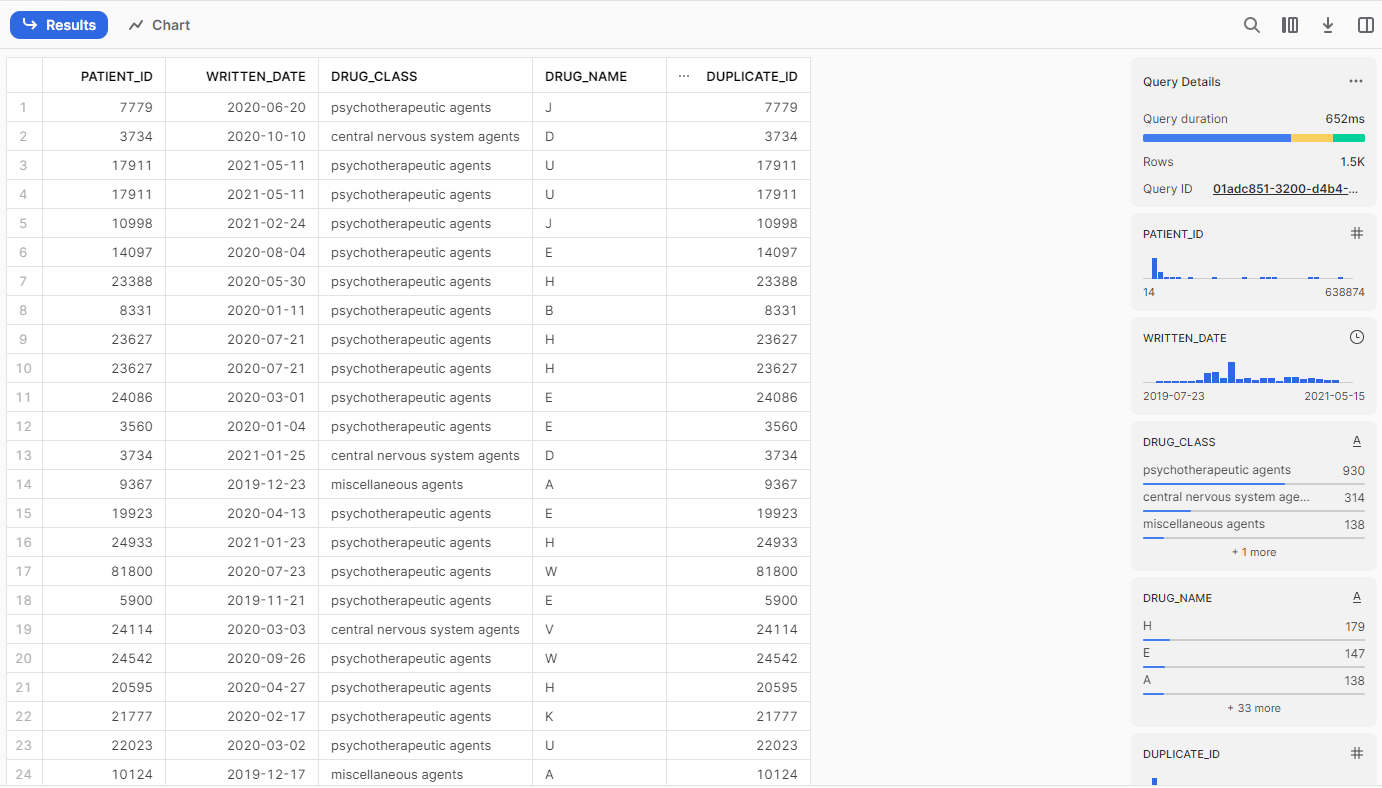
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>



So it looks like out of the 1459 duplicate records, there are instances where one record has more than 1 duplicate. Let's confirm this using the record for patient id 17911 that has 2 duplicates shown in the result above. See query below.

<br>


```sql

SELECT *
FROM drugs
WHERE patient_id = 17911 
    AND written_date = '2021-05-11' 
    AND drug_class = 'psychotherapeutic agents'
    AND drug_name = 'U';
------------------------

```

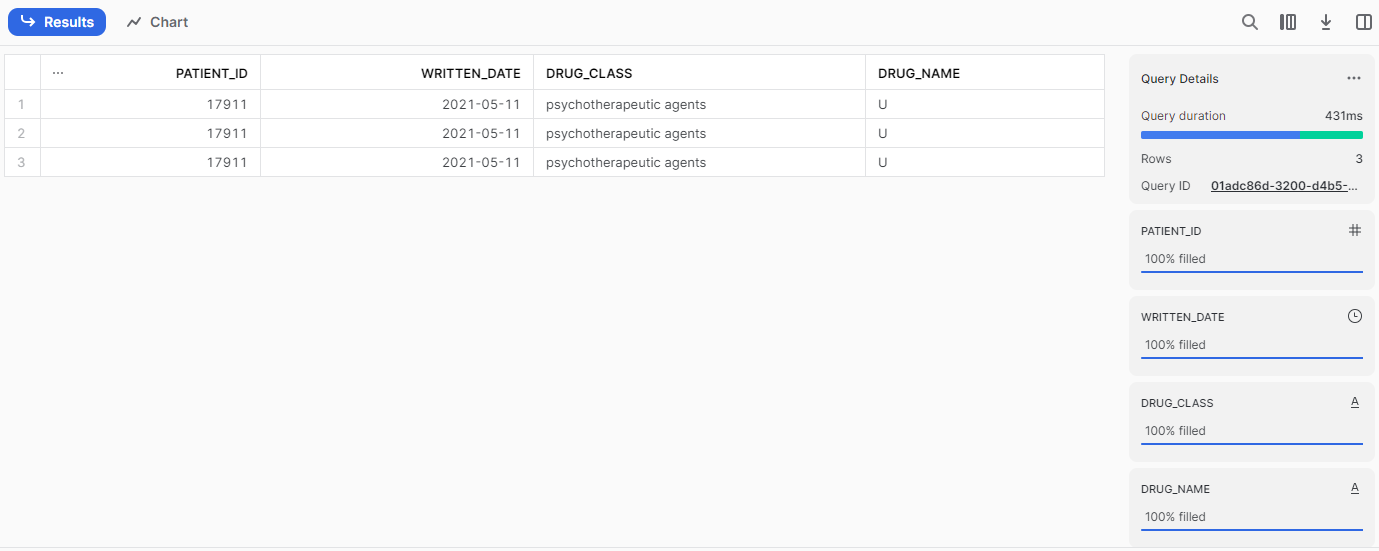
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>

It's confirmed that there could be more than 1 duplicate for each record, as in the case of patient id 17911 with 3 entries of the same record (i.e 1 original, and 2 duplicates). This is useful during data wrangling/cleansing.

<br>


```sql

--  Query to check earliest and latest prescription dates
SELECT 
    MIN(written_date) AS earliest_prescription_date,
    MAX(written_date) AS latest_prescription_date
FROM drugs;
-----------

```

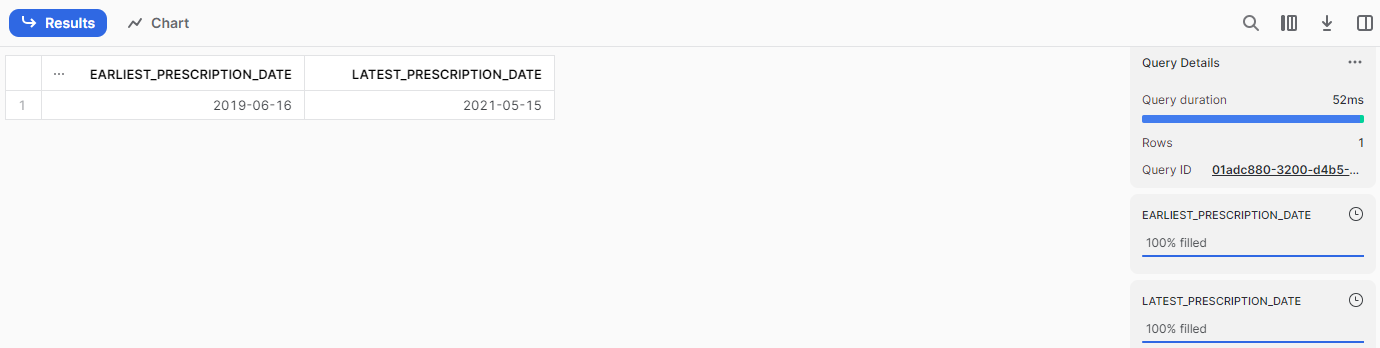
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>

**Observations:**
- The earliest recorded date for prescription writing was "2019-06-16."
- The latest recorded date for prescription writing was "2021-05-15."
- All dates were recorded in the "yyyy-mm-dd" format.

<br>

The above query is very handy when performing checks for missing records and data audits, as the result of the earliest and latest prescription dates can reveal gaps in the database records (if any). For example, if this query was run on 2021-05-20, and it returned "2021-05-15" as the latest prescription dates, even though clinicians mentioned that drugs were prescribed on the 16th, 17th, 18th and 19th, then it would raise an alarm to investigate why those drug prescriptions after 2021-05-15 were not recorded in the database.

<br>


<br>

**Next I want to check for records with null values in any column, and visually assess the returned result**

Depending on the number of variables/columns in the table, it may not be efficient to hard-code this query with all the column names. So I am using a stored procedure in Snowflake to generate a Query statement that when executed, will check all columns in my table and return records with null values in any column.

**Note:** _Snowflake currently does not support executing dynamic SQL directly returned from a stored procedure. So for now, this stored procedure can be used on any table to generate the query that when executed, retrieves all records with null values in any column in that table._


```sql

-- First, drop any stored procedure named "find_null_records()"
DROP PROCEDURE IF EXISTS find_null_records();

-- Then Create the stored procedure, to return the query as a string so I can copy and run it as a SQL query
CREATE OR REPLACE PROCEDURE find_null_records()
RETURNS STRING
LANGUAGE JAVASCRIPT
AS
$$
    var query = "SELECT * FROM drugs WHERE ";
    var stmt = snowflake.createStatement({
        sqlText: `SHOW COLUMNS IN TABLE drugs`,
    });
    var rs = stmt.execute();
    var firstColumn = true;
    while (rs.next()) {
        var columnName = rs.getColumnValue('column_name');
        if (!firstColumn) {
            query += " OR ";
        }
        query += columnName + " IS NULL ";
        firstColumn = false;
    }
    return query;
$$;

-- Calling the stored procedure to execute the dynamically constructed query statement
CALL find_null_records();
------------------------

```

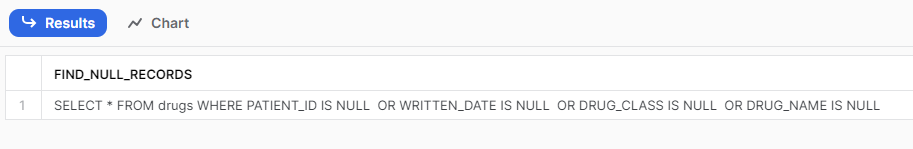
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>


Now I can copy the query string that was generated above and execute it. See below.

<br>


```sql

-- Checking for missing records/values in any of the columns
SELECT *
FROM drugs
WHERE patient_id IS NULL
    OR written_date IS NULL
    OR drug_name IS NULL
    OR drug_class IS NULL;
-------------------------

```

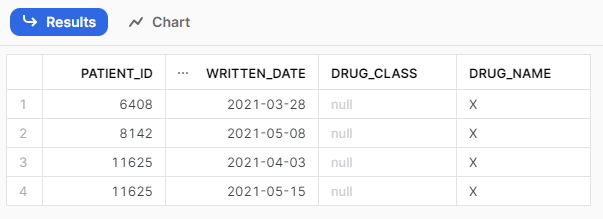

<br>


```sql

-- Distribution of Drug Classes (Not including duplicates)
SELECT
    drug_class,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0) / (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM drugs) AS distinct_records), 1) AS percentage,
    array_agg(DISTINCT drug_name) AS drugs_in_this_class -- List all unique drug names belonging to each drug class
FROM (SELECT DISTINCT * FROM drugs) AS distinct_records
GROUP BY drug_class
ORDER BY count DESC;
--------------------

```

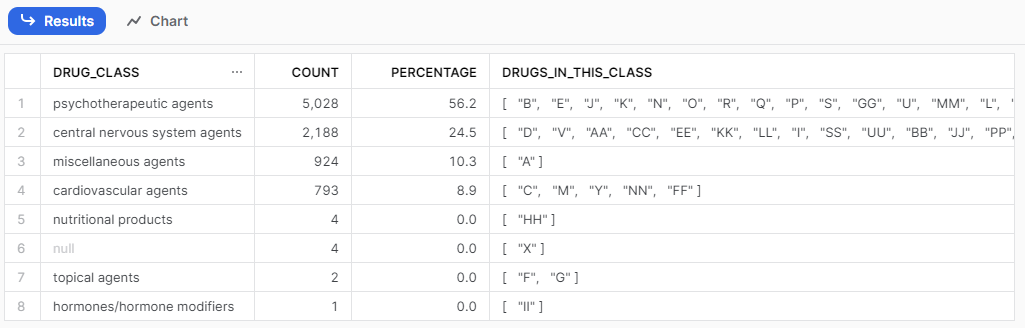
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>

<br>


**Note:** _The `array_agg` function is really helpful here as it creates a list of all unique drug names belonging to each drug class._ 

<br>

**Observations:**
- Most commonly prescribed class of drugs was "psychotherapeutic agents," accounting for 56% of all prescriptions.
- Second most prescribed class was "central nervous system agents" with a share of 25%.
- "Miscellaneous agents" and "Cardiovascular agents"constituted approximately 10% and 9% of prescribed drugs respectively.
- Classes of drugs such as nutritional products, topical agents, and hormones/hormone modifiers were rarely prescribed.
- The only drug in the `miscellaneous agents` drug class was drug "A", and because it single-handedly accounted for 10% of all prescribed drugs prompted the need for further investigation.

<br>


```sql

-- DIstribution of Drug Names (Not including duplicates)
SELECT
    drug_name,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0) / (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM drugs) AS distinct_records), 1) AS percentage,
    drug_class
FROM (SELECT DISTINCT * FROM drugs) AS distinct_records
GROUP BY drug_name, drug_class
ORDER BY count DESC;
--------------------

```

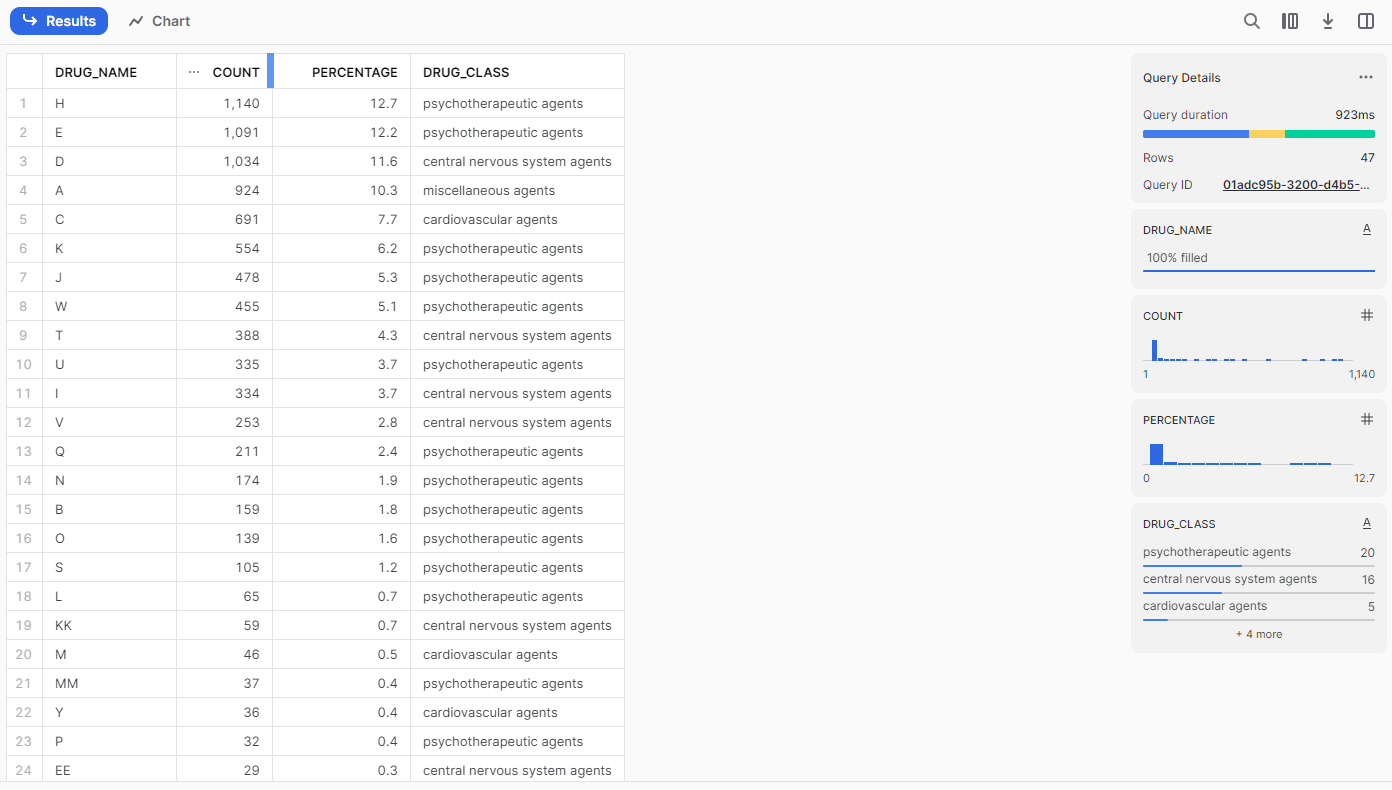
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


<br>

**Observations:**
- The top three prescribed drugs (H, E, and D) belong to the categories of "psychotherapeutic agents" or "central nervous system agents."
- These drugs accounted for approx. 37% of all prescriptions.
- Drug 'A' from the "miscellaneous agents" class constituted approx. 10% of all prescribed drugs.

<br>


### Calculating the delta between the current and prior PHQ scores and the amount of time elapsed between the score dates

```sql

SELECT
    patient_id,
    phq_score,
    score_date,
    LAG(phq_score) OVER (PARTITION BY patient_id ORDER BY score_date) AS prior_phq_score,
    LAG(score_date) OVER (PARTITION BY patient_id ORDER BY score_date) AS prior_score_date,
    phq_score - LAG(phq_score) OVER (PARTITION BY patient_id ORDER BY score_date) AS phq_score_delta,
    score_date - LAG(score_date) OVER (PARTITION BY patient_id ORDER BY score_date) AS score_date_delta
FROM
    (SELECT DISTINCT * FROM scores) AS distinct_records
ORDER BY
    patient_id, score_date;
--------------------------

```

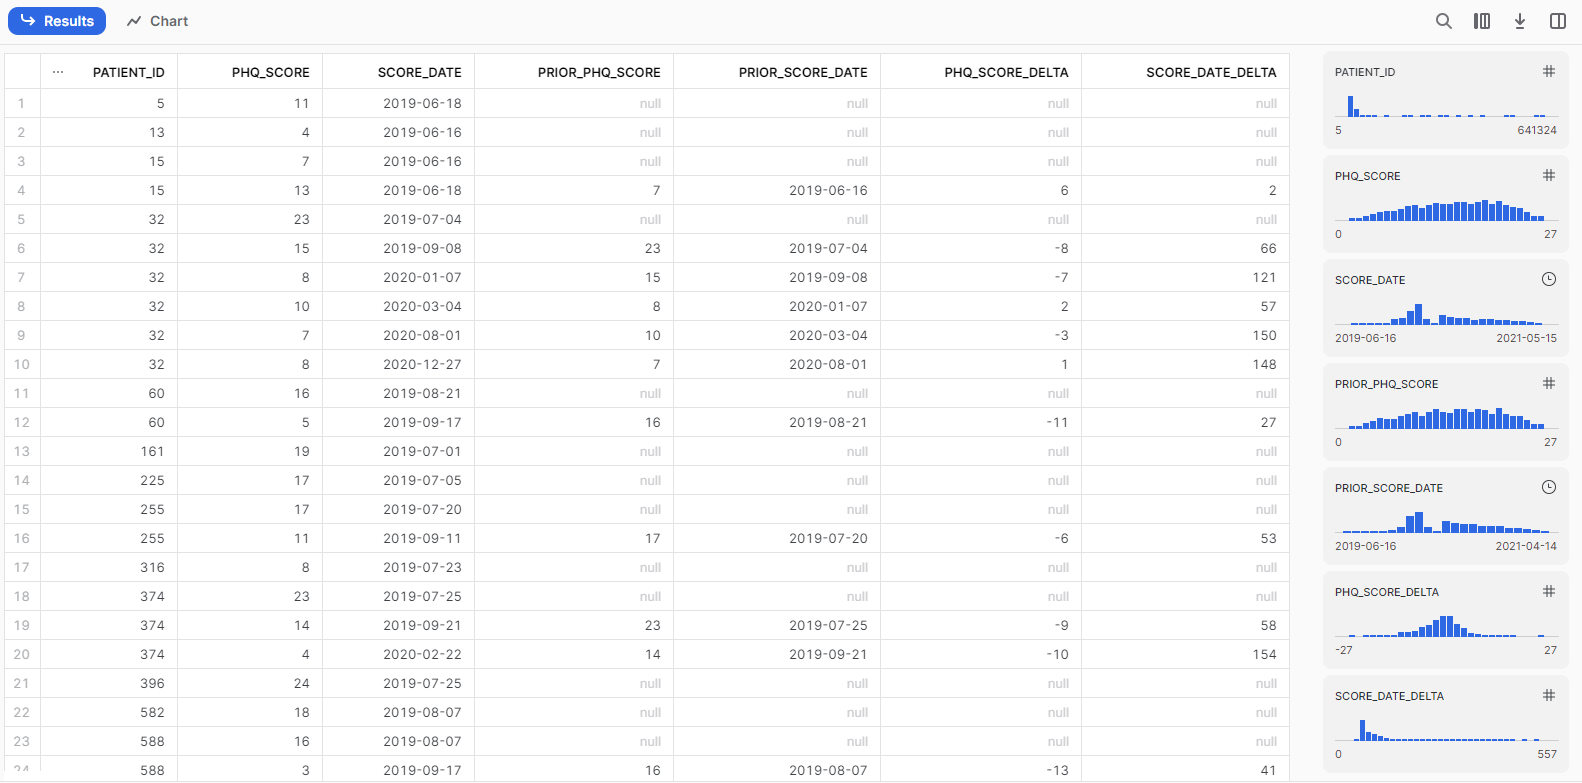
<div align="center"> <i> Zoom into the image for clearer view (if necessary) </i> </div>


<br>

A small subset of patient’s scores are shown in the transformed scores table above. 

It provides a comparison view of patients' PHQ scores, their previous assessment scores, dates of current assessment and previous assessment. Also provides insights into the change in PHQ scores over time and the duration between assessments. 

<br>

**Analyzing the result for one patient with patient_id 15**
- On June 16, 2019, a PHQ score of 7 was recorded, but there was no prior assessment to compare it with.
- Two days later, on June 18, the new PHQ score was 13, indicating a difference (delta) of 6 points from the previous score and an increase in symptom severity.
- The time between the two assessments was two days.
- The delta and time elapsed between PHQ scores were calculated for every patient who completed the assessment.
- The analysis of deltas allowed for determining the rise or fall in symptom severity over time.
- The time elapsed between assessments provided insights into the frequency of assessments and the progression of each patient's condition.

<br>


### How many patients were prescribed a drug before their first PHQ assessment?

```sql

-- How many patients were prescribed a drug before their first PHQ assessment?
SELECT COUNT(*) AS patient_count
-- Using a subquery within the FROM clause
FROM (
    SELECT 
        d.patient_id,
        MIN(d.written_date) AS first_presc_date,
        MIN(s.score_date) AS first_score_date
    FROM (SELECT DISTINCT * FROM drugs) AS d -- Avoiding duplicate records in the drugs table
    INNER JOIN (SELECT DISTINCT * FROM scores) AS s -- Avoiding duplicate records in the scores table
        ON d.patient_id = s.patient_id
    GROUP BY d.patient_id
    HAVING MIN(d.written_date) < MIN(s.score_date)
) AS sub;
--------------------------------------------------

```

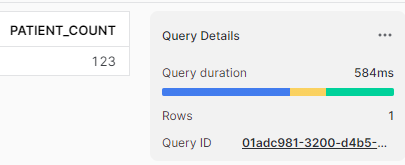

<br>

**Observation:**
- 123 patients were prescribed a drug before their first PHQ assessment

<br>


### How many female patients were assessed for PHQ score at least twice after the first time they were prescribed drug H?

```sql

-- How many female patients were assessed for PHQ score at least twice after the first time they were prescribed drug H?

WITH cte AS (
SELECT 
    DISTINCT (CAST(SUBSTR(p.patient_id, 12) AS INT)) AS patient_id,
    MIN(d.written_date) AS first_pres_date
FROM (SELECT DISTINCT * FROM drugs) AS d
JOIN patients AS p ON d.patient_id = CAST(SUBSTR(p.patient_id, 12) AS INT)
WHERE drug_name = 'H'
    AND p.sex = 'female'
GROUP BY CAST(SUBSTR(p.patient_id, 12) AS INT)
    ),

t1 AS (
SELECT 
    DISTINCT c.patient_id,
    first_pres_date,
    array_agg(s.score_date) AS phq_assessment_dates
FROM cte AS c
JOIN scores AS s
    ON c.patient_id = s.patient_id
WHERE s.score_date > c.first_pres_date
GROUP BY c.patient_id, first_pres_date
HAVING COUNT(s.score_date) >= 2
    )
    
SELECT COUNT(*)
FROM t1;
---------------

```

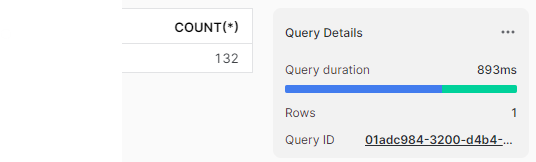

<br>

**Observation:**
- There were 132 records of female patients who completed the assessment and obtained PHQ scores at least twice after the first time that they were prescribed drug H.

<br>

## Recommendations & Next Steps

<br>

**Recommendations include:**

- Further investigation into high prescription rates of specific drug categories
- Examination of unique characteristics of drugs accounting for 10% of prescriptions
- Comparative analysis to identify patterns and correlations between drug classes
- Evaluation of utilization patterns of specific drug categories
- Exploration of clinical characteristics and demographics of patients receiving different drug classes
- Assessment of the impact of drug classes on treatment outcomes and patient satisfaction

<br>

**Next steps to enhance the analysis:**

- Data enrichment to boost data analytics report on factors influencing drug prescribing patterns
- Incorporating data from additional sources, such as electronic health records and collecting more data from patient surveys
- Utilizing historical clinical trial data, drug databases and depression medication databases
- Identifying the impact of these patterns on patients experiencing symptoms of depression can yield promising returns for all relevant stakeholders


## Conclusion

The analysis of the patients' dataset, gender distribution, scores dataset, drugs dataset, and prescription dates provided valuable insights into various aspects of the study. There were 1486 patient records, and all of them were distinct with no duplicates. The majority of patients were female (79%), and the female to male ratio was 4 to 1. The average PHQ score was 14.8, indicating a moderate level of depression symptoms. Most patients reported higher levels of depression, with severe depression being the most significant category.

Data cleaning and wrangling techniques were employed to remove duplicates and missing values from the datasets. The analysis also revealed the most commonly prescribed drug classes, with "psychotherapeutic agents" being the most prevalent. Drug "A" from the "miscellaneous agents" class was noteworthy as it accounted for 10% of all prescriptions, warranting further investigation.

The analysis of PHQ scores over time allowed for understanding the changes in symptom severity and the duration between assessments for each patient. The analysis identified 123 patients who were prescribed drugs before their first PHQ assessment and 132 female patients who had at least two PHQ assessments after being prescribed drug H.

Based on the observations, recommendations were made to further investigate high prescription rates of specific drug categories, examine unique characteristics of drugs accounting for significant proportions of prescriptions, and conduct a comparative analysis to identify patterns and correlations between drug classes. Additionally, the impact of drug classes on treatment outcomes and patient satisfaction should be assessed.

To enhance the analysis, data enrichment, incorporation of additional data sources, and utilization of historical clinical trial data and drug databases were recommended. Understanding the factors influencing drug prescribing patterns and their impact on patients with depression could lead to meaningful improvements in patient care and treatment outcomes.

The next phase of this project would involve:
- Data Wrangling/Cleaning using python to programmatically assess the data and address data quality & tidiness issues
- Data Enrichment to collect more data needed for analysis
- Deep-dive insights using python in Snowflake to explore the relationships between variables
- Generate hypothesis to experiment on to further investigate the impact of patient’s PHQ assessment on drug prescription and frequency

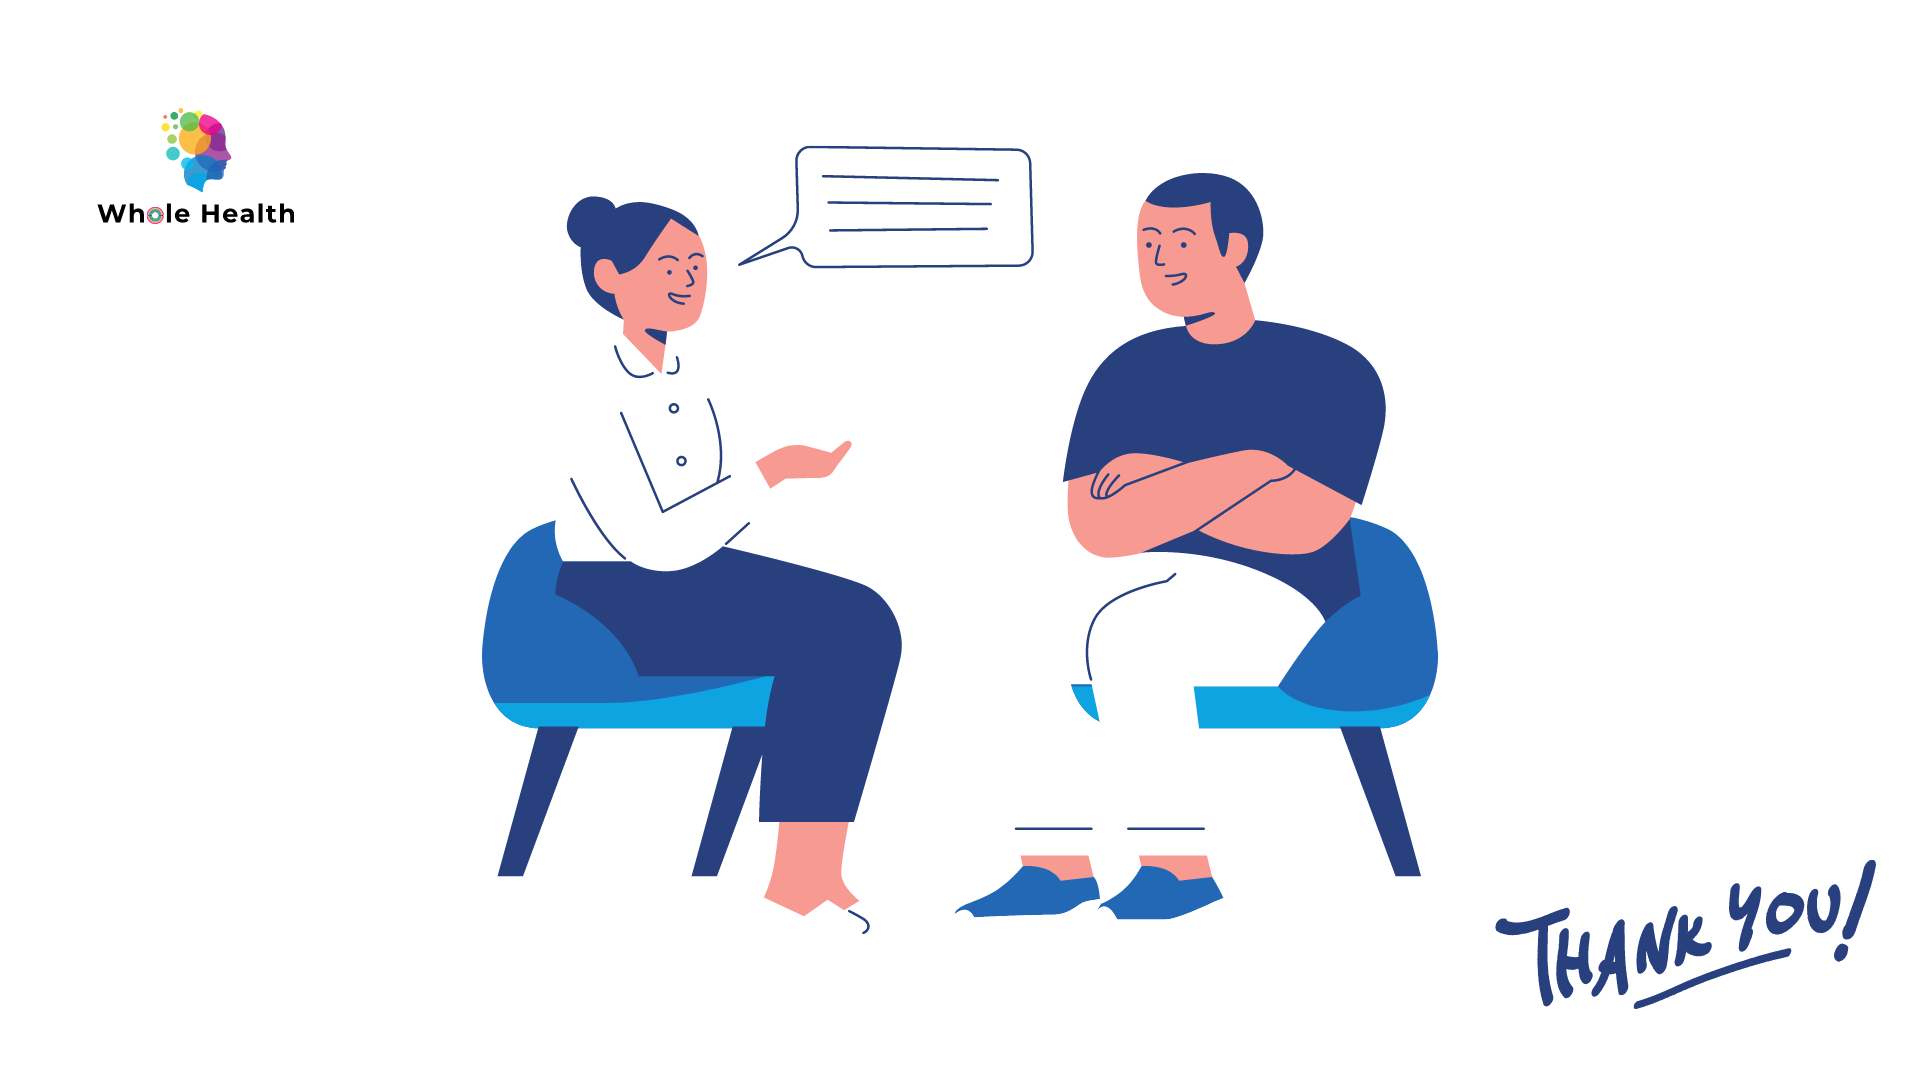